s = 10
s = 20
s = 30
s = 40
s = 50
s = 60
s = 70
s = 80
s = 90
s = 100
s = 110
s = 120
s = 130
s = 140
s = 150
s = 160
s = 170
s = 180
s = 190
s = 200
 44.869655 seconds (55.92 M allocations: 6.058 GiB, 5.31% gc time, 51.67% compilation time)


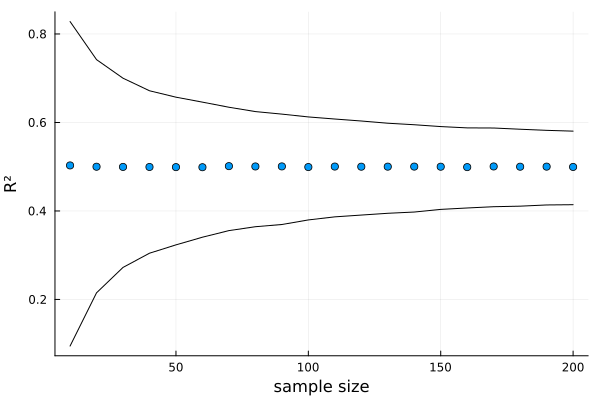

In [9]:
#1
using GLM, Plots, DataFrames, Statistics

sizes, reps = 10:10:200, 10000

function sim_r²(n)
    x = randn(n)
    y = [1 + randn() + v for v in x]
    df = DataFrame(x=x, y=y)
    model = lm(@formula(y ~ x), df)
    return r²(model)
end

r²_q95, r²_q5, r²_mean = Float64[], Float64[], Float64[]

@time for s in sizes
    @show s
    result = [sim_r²(s) for _ in 1:reps]
    push!(r²_mean, mean(result))
    push!(r²_q5, quantile(result, 0.05))
    push!(r²_q95, quantile(result, 0.95))
end

scatter(sizes, r²_mean, xlabel="sample size", ylabel="R²", legend=false)
plot!(sizes, r²_q5, color="black")
plot!(sizes, r²_q95, color="black")


In [10]:
#2
using GLM, Plots, DataFrames, Statistics, Random

function sim_r²_k(n, k, reps)
    x, y, result = ones(n, k+1), zeros(n), Float64[]
    for _ in 1:reps
        randn!(view(x, :, 1:k)); sum!(y, x)
        for i in 1:n
            y[i] += randn()
        end
        model = lm(x, y)
        push!(result, r²(model))
    end
    return result
end

function run(k, reps=10000, maxn=200)
    sizes = 10:10:maxn
    r²_q95, r²_q5, r²_mean = Float64[], Float64[], Float64[]

    @time for s in sizes
        @show s
        result = sim_r²_k(s, k, reps)
        push!(r²_mean, mean(result))
        push!(r²_q5, quantile(result, 0.05))
        push!(r²_q95, quantile(result, 0.95))
    end

    scatter(sizes, r²_mean, xlabel="sample size", ylabel="R²", legend=false)
    plot!(sizes, r²_q5, color="black")
    plot!(sizes, r²_q95, color="black")
end


run (generic function with 3 methods)

# Lesson 7

In [1]:
using Statistics
using DataFrames

function test(μ)
    result = [m + 3 * randn() for m in μ]
    est1 = result
    μ₀ = fill(20, length(μ))
    est2 = μ₀ + max((1 - 1 / sum(x -> x^2, result - μ₀)), 0.0) * (result - μ₀)
    return (MSE1 = mean(x -> x^2, est1 - μ),
            MSE2 = mean(x -> x^2, est2 - μ))
end

experiment = DataFrame()
for i in 1:1_000_000
    push!(experiment, test([16, 18, 26]))
end
describe(experiment, :detailed)


Row,variable,mean,std,min,q25,median,q75,max,nunique,nmissing,eltype
,Symbol,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Nothing,Int64,DataType
1,MSE1,9.007,7.35172,0.000553066,3.64718,7.10432,12.3352,94.9123,,0,Float64
2,MSE2,8.87933,7.23078,0.00102956,3.60487,7.01628,12.1698,93.9953,,0,Float64
